In [103]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [83]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'
    
def get_fiscal_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

## Combine Data

In [84]:
car_combined = pd.read_csv('car_combined.cvs')
cpi = pd.read_csv('cpi_processed.cvs')
car_combined.head()

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,...,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,ford,expedition,Double Overhead Camshaft,Auto,Black,...,6.0,AUTOMATIC,four wheel drive,4.0,Large,4dr SUV,20,15,5657,58185
1,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,ford,expedition,Double Overhead Camshaft,Auto,Black,...,6.0,AUTOMATIC,rear wheel drive,4.0,Large,4dr SUV,21,15,5657,62025
2,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,ford,expedition,Double Overhead Camshaft,Auto,Black,...,6.0,AUTOMATIC,rear wheel drive,4.0,Large,4dr SUV,21,15,5657,62985
3,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,ford,expedition,Double Overhead Camshaft,Auto,Black,...,6.0,AUTOMATIC,rear wheel drive,4.0,Large,4dr SUV,22,16,5657,59375
4,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,ford,expedition,Double Overhead Camshaft,Auto,Black,...,6.0,AUTOMATIC,four wheel drive,4.0,Large,4dr SUV,20,14,5657,66025


In [85]:
cpi.head()

,CPI,Year,Month,Day
0,21.48,1947,1,1
1,21.62,1947,2,1
2,22.00,1947,3,1
3,22.00,1947,4,1
4,21.95,1947,5,1


Combine datasets into one dataset. We will join on date.

In [86]:
complete_df = pd.merge(car_combined, cpi, left_on=['Year_x', 'Month', 'Day'], right_on=['Year', 'Month', 'Day'], how='inner')
complete_df.head()

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,...,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,CPI,Year
0,C_CND_000636,Mila,Female,671500,Scrivener Performance Engineering,toyota,sienna,Overhead Camshaft,Manual,Pale White,...,all wheel drive,4.0,Large,Passenger Minivan,23,16,2031,42880,287.553,2022
1,C_CND_000636,Mila,Female,671500,Scrivener Performance Engineering,toyota,sienna,Overhead Camshaft,Manual,Pale White,...,all wheel drive,4.0,Large,Passenger Minivan,23,16,2031,37400,287.553,2022
2,C_CND_000636,Mila,Female,671500,Scrivener Performance Engineering,toyota,sienna,Overhead Camshaft,Manual,Pale White,...,all wheel drive,4.0,Large,Passenger Minivan,23,16,2031,40655,287.553,2022
3,C_CND_000636,Mila,Female,671500,Scrivener Performance Engineering,toyota,sienna,Overhead Camshaft,Manual,Pale White,...,front wheel drive,4.0,Large,Passenger Minivan,25,18,2031,37445,287.553,2022
4,C_CND_000636,Mila,Female,671500,Scrivener Performance Engineering,toyota,sienna,Overhead Camshaft,Manual,Pale White,...,front wheel drive,4.0,Large,Passenger Minivan,25,18,2031,35200,287.553,2022


In [87]:
columns = complete_df.columns.to_list()
print(columns)

['Car_id', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region', 'Month', 'Day', 'Year_x', 'Make', 'Year_y', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG', 'city mpg', 'Popularity', 'MSRP', 'CPI', 'Year']


Some of these columns will not be helpful for data mining. We will drop the unecessary columns. There are three ambiguously named 'Year' columns. We will drop one of the two which represent the year of the sale and rename the columns to 'Manufacture_Year', and 'Sale_Year' to more clearly indicate the content of these columns.

In [88]:
columns_to_drop = ['Car_id', 'Dealer_No ', 'Year_x', 'Customer Name', 'Phone']
complete_df.drop(columns_to_drop, axis=1, inplace=True)
complete_df = complete_df.rename(columns={'Year_y':'Manufacture_Year', 'Year':'Sale_Year'})

## Data Exploration and Summarization

We will investigate the distribution of the data using histograms.

In [107]:
complete_df['Day'].nunique()

1

array([[<Axes: title={'center': 'Annual Income'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'Manufacture_Year'}>,
        <Axes: title={'center': 'Engine HP'}>,
        <Axes: title={'center': 'Engine Cylinders'}>,
        <Axes: title={'center': 'Number of Doors'}>],
       [<Axes: title={'center': 'highway MPG'}>,
        <Axes: title={'center': 'city mpg'}>,
        <Axes: title={'center': 'Popularity'}>,
        <Axes: title={'center': 'MSRP'}>],
       [<Axes: title={'center': 'CPI'}>,
        <Axes: title={'center': 'Sale_Year'}>, <Axes: >, <Axes: >]],
      dtype=object)

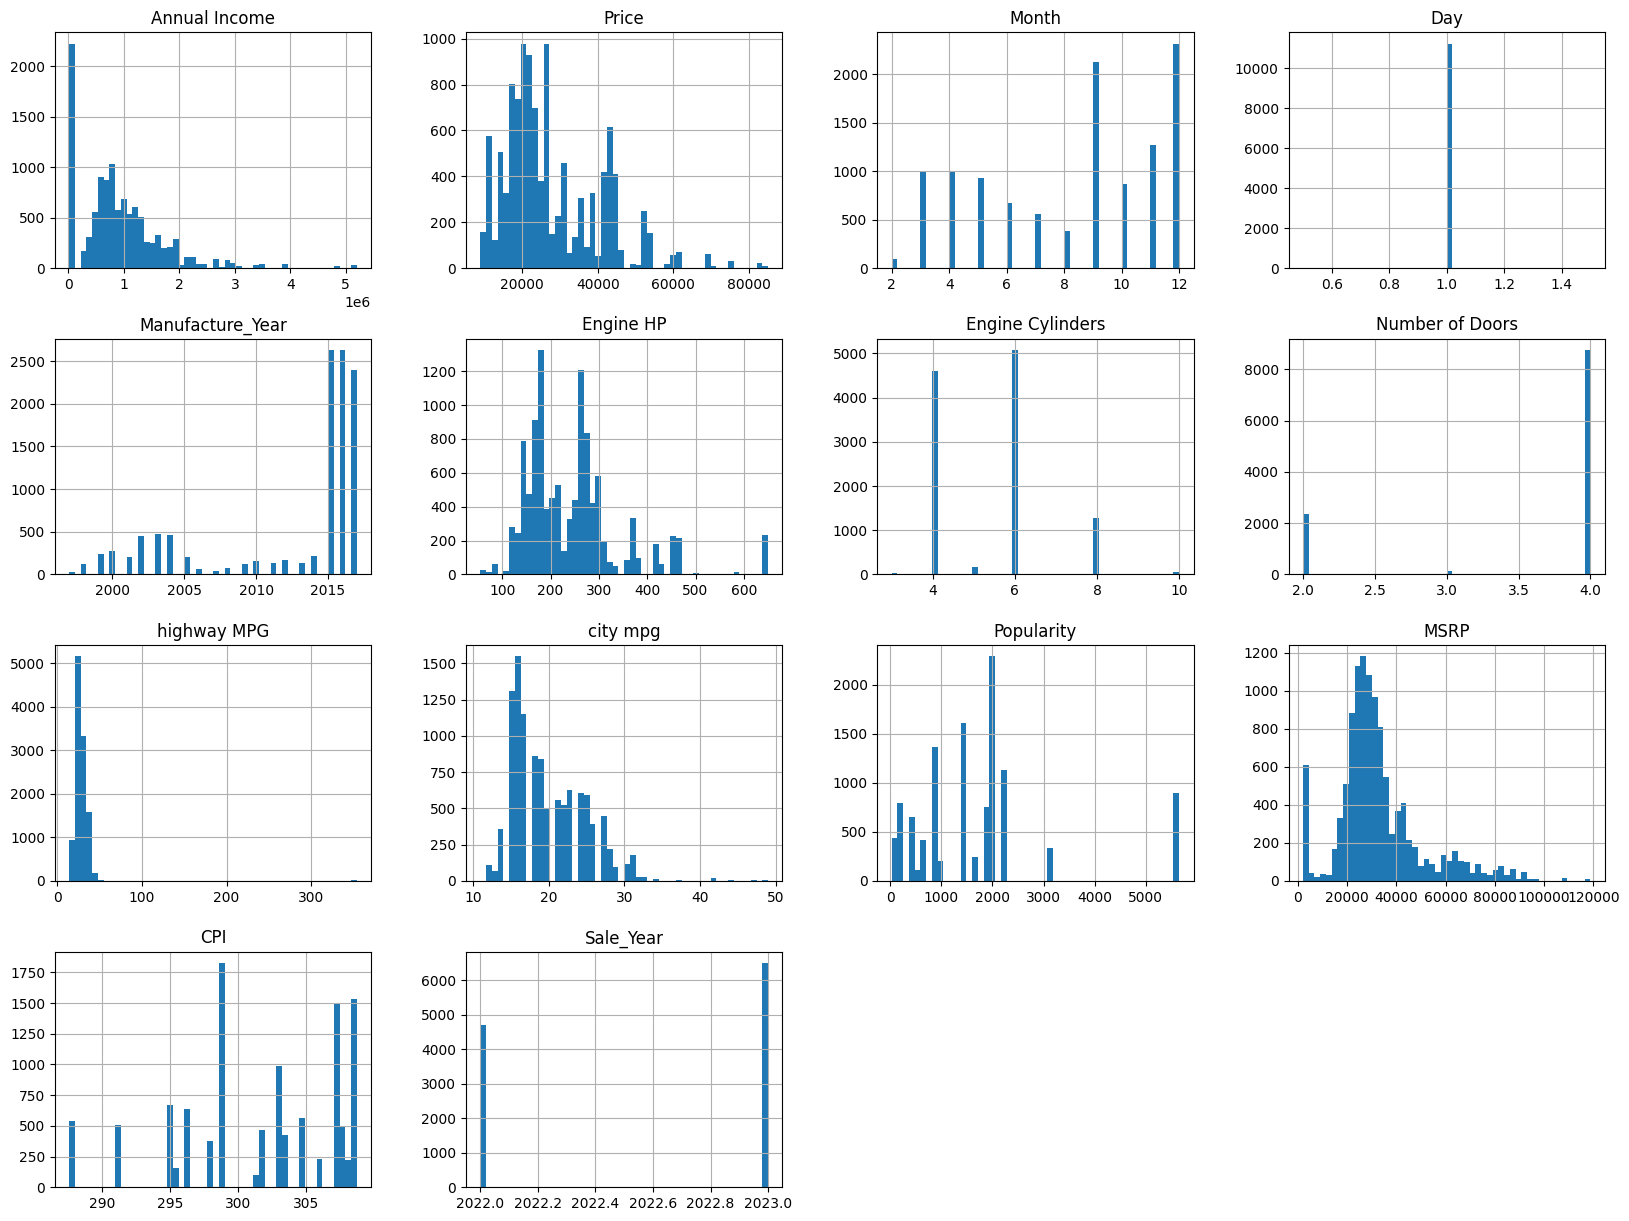

In [101]:
complete_df.hist(bins = 50, figsize=(20,15))

We will use a heatmap to investigate the coorelation between columns.

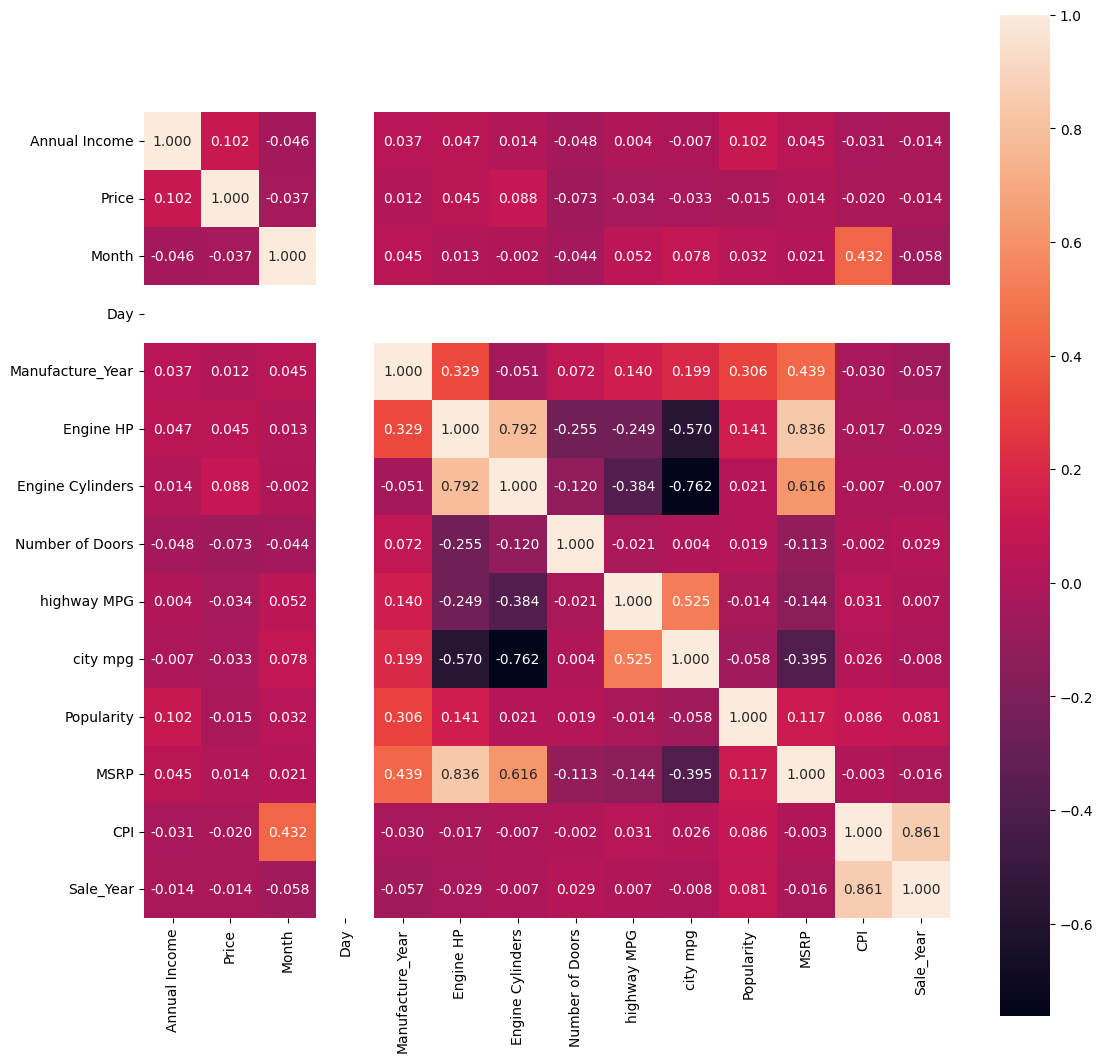

In [106]:
numeric_df = complete_df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()
f,ax = plt.subplots(figsize=(13, 13))
sns.heatmap(numeric_df.corr(), annot=True, square=True , fmt = ".3f")
plt.show()

## Preprocessing

In [90]:
def one_hot_encode(dataframe, columns):
    encoder = OneHotEncoder()
    encoded_data = encoder.fit_transform(dataframe[columns])
    encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(columns))
    dataframe.drop(columns, axis=1, inplace=True)
    return pd.concat([dataframe, encoded_df], axis=1)

def label_encode(dataframe, columns):
    encoder = LabelEncoder()
    for column in columns:
        dataframe[column] = encoder.fit_transform(dataframe[column])
    return dataframe

def frequency_encode(dataframe, columns):
    for column in columns:
        frequency = dataframe[column].value_counts(normalize=True)
        dataframe[column + '_freq_encoded'] = dataframe[column].map(frequency)
    return dataframe

def standardize_cols(dataframe, columns):
    scaler = StandardScaler()
    for column in columns:
        dataframe[column + '_standardized'] = scaler.fit_transform(dataframe[[column]])
        dataframe.drop(column, axis=1, inplace=True)
    return dataframe

def normalize_numeric_data(dataframe, columns):
    for column in columns:
        min_val = dataframe[column].min()
        max_val = dataframe[column].max()
        dataframe[column + '_normalized'] = (dataframe[column] - min_val) / (max_val - min_val)
    return dataframe


In [91]:
columns = ['Make', 'Model', 'Dealer_Region', 'Dealer_Name']

for column in columns:
    print(column, "unique values: ", complete_df[column].nunique(), "\n")

Make unique values:  22 

Model unique values:  112 

Dealer_Region unique values:  7 

Dealer_Name unique values:  28 



In [92]:
one_hot_columns = ['Gender', 'Engine', 'Transmission', 'Color', 'Body Style', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Style', 'Dealer_Region']
label_columns = ['Vehicle Size']
numerical_columns = ['Annual Income', 'Price', 'highway MPG', 'city mpg', 'Popularity', 'MSRP', 'CPI', 'Manufacture_Year', 'Sale_Year']

In [93]:
processed_df = one_hot_encode(complete_df, one_hot_columns)
processed_df = label_encode(processed_df, label_columns)

array([[<Axes: title={'center': 'Annual Income'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'Manufacture_Year'}>,
        <Axes: title={'center': 'Engine HP'}>,
        <Axes: title={'center': 'Engine Cylinders'}>,
        <Axes: title={'center': 'Number of Doors'}>],
       [<Axes: title={'center': 'highway MPG'}>,
        <Axes: title={'center': 'city mpg'}>,
        <Axes: title={'center': 'Popularity'}>,
        <Axes: title={'center': 'MSRP'}>],
       [<Axes: title={'center': 'CPI'}>,
        <Axes: title={'center': 'Sale_Year'}>, <Axes: >, <Axes: >]],
      dtype=object)

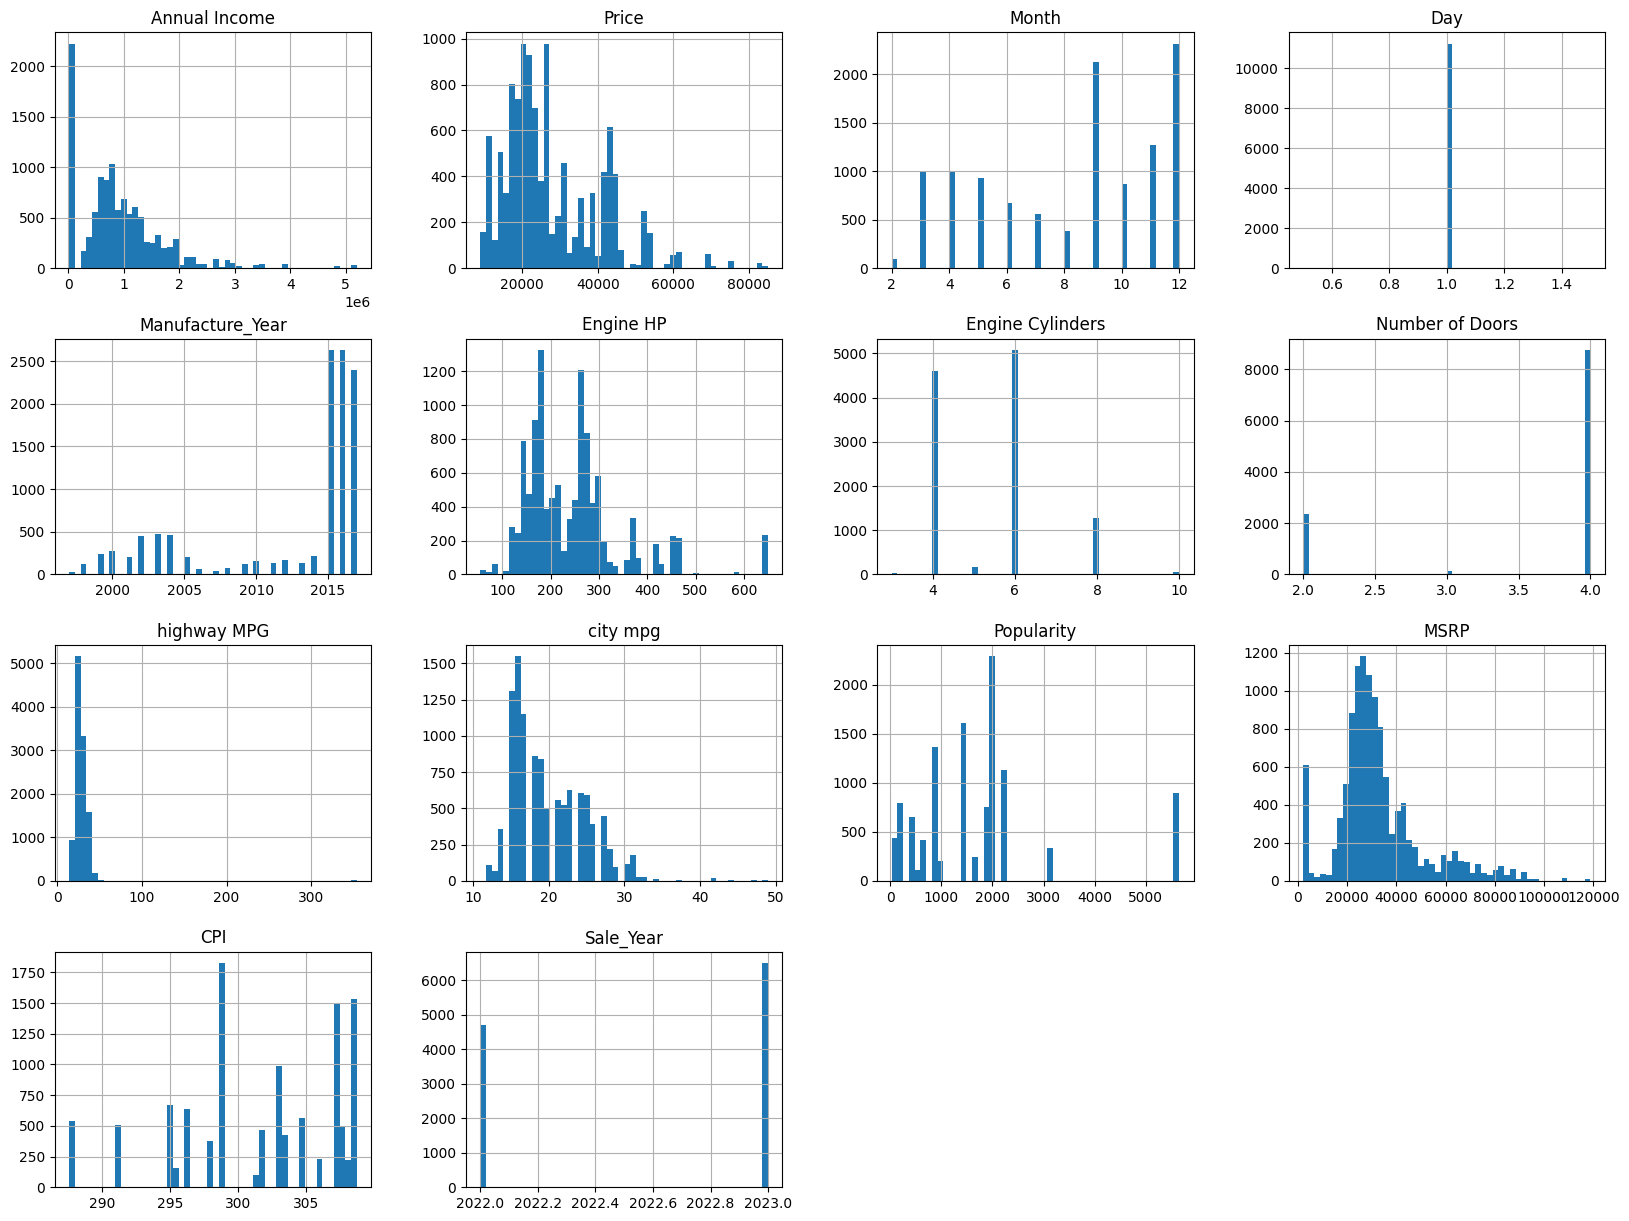

In [100]:
processed_df_n = processed_df.copy()
processed_df = standardize_cols(processed_df, numerical_columns)
numerical_columns_standardized = [column + '_standardized' for column in numerical_columns]


array([[<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Engine HP'}>,
        <Axes: title={'center': 'Engine Cylinders'}>,
        <Axes: title={'center': 'Number of Doors'}>,
        <Axes: title={'center': 'Vehicle Size'}>,
        <Axes: title={'center': 'Gender_Female'}>,
        <Axes: title={'center': 'Gender_Male'}>],
       [<Axes: title={'center': 'Engine_Double Overhead Camshaft'}>,
        <Axes: title={'center': 'Engine_Overhead Camshaft'}>,
        <Axes: title={'center': 'Transmission_Auto'}>,
        <Axes: title={'center': 'Transmission_Manual'}>,
        <Axes: title={'center': 'Color_Black'}>,
        <Axes: title={'center': 'Color_Pale White'}>,
        <Axes: title={'center': 'Color_Red'}>,
        <Axes: title={'center': 'Body Style_Hardtop'}>],
       [<Axes: title={'center': 'Body Style_Hatchback'}>,
        <Axes: title={'center': 'Body Style_Passenger'}>,
        <Axes: title={'center': 'Body Style_S

Error in callback <function flush_figures at 0x0000025311E8EFC0> (for post_execute):


KeyboardInterrupt: 

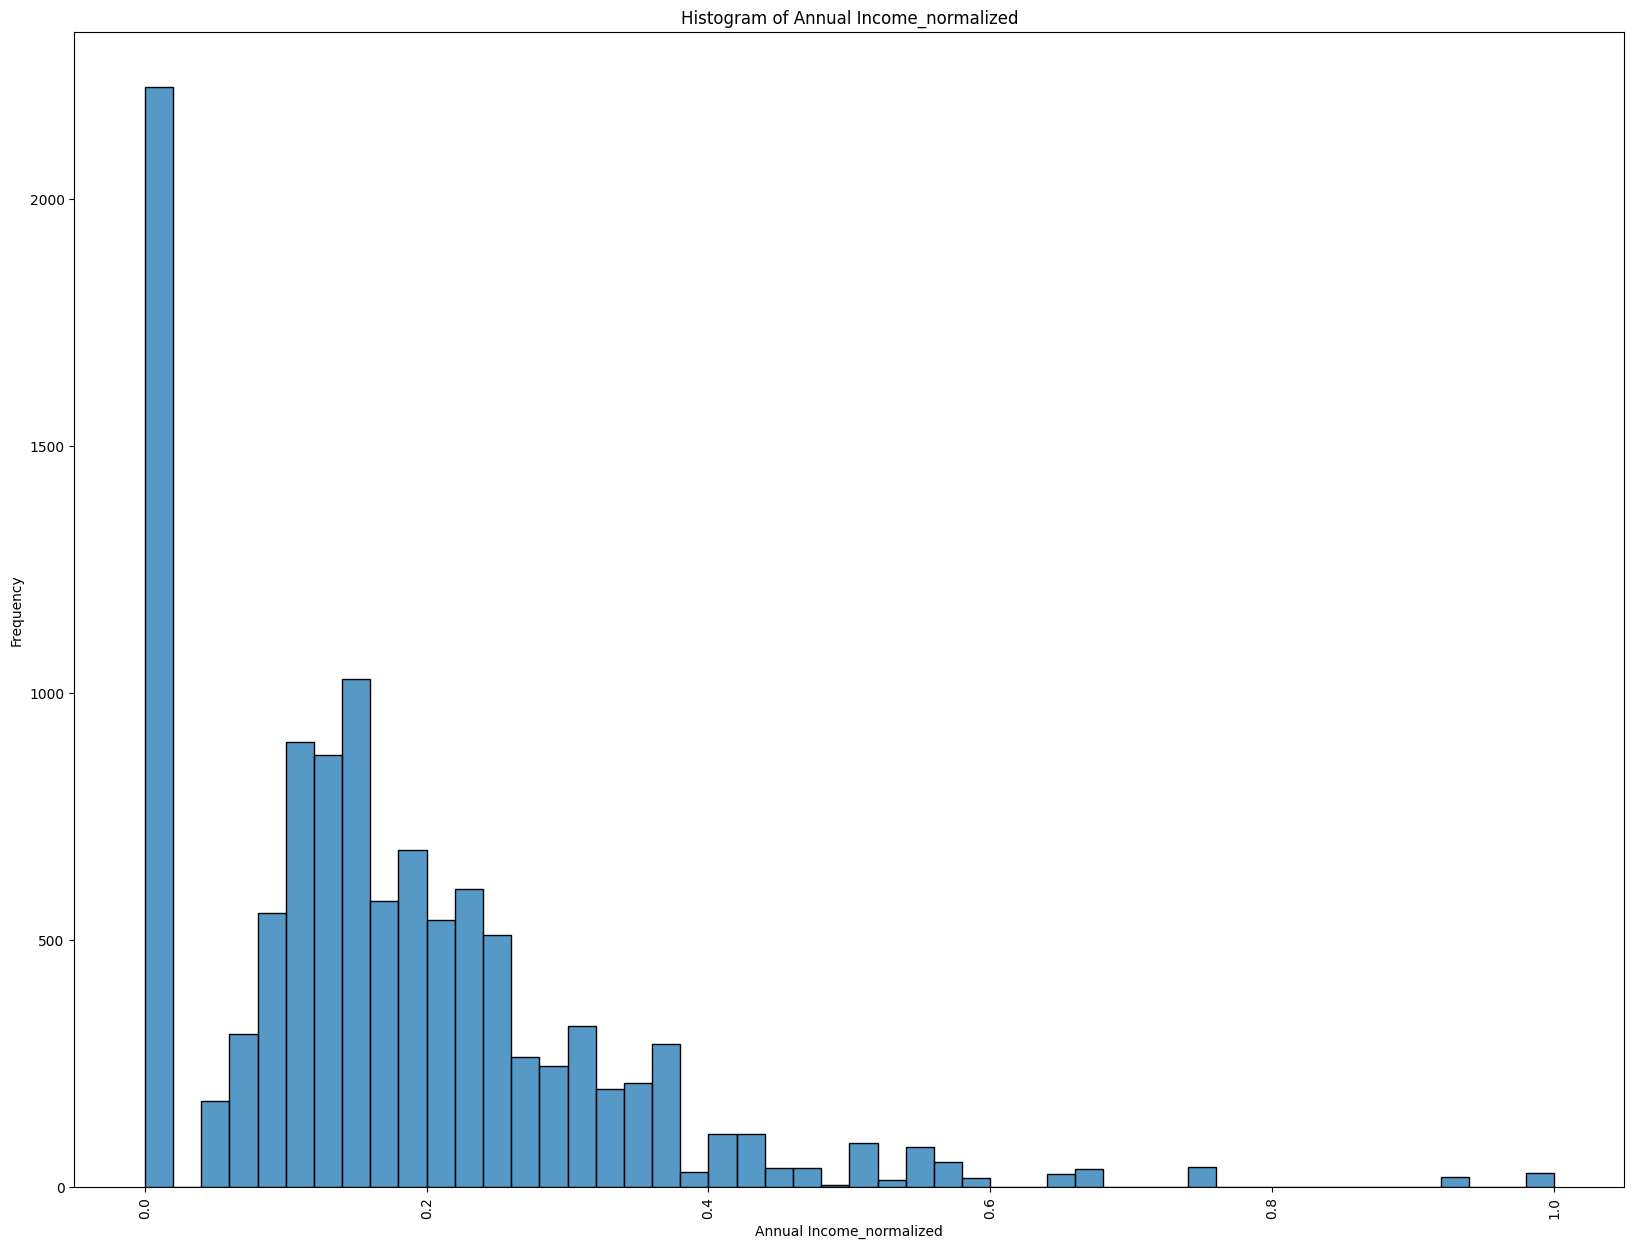

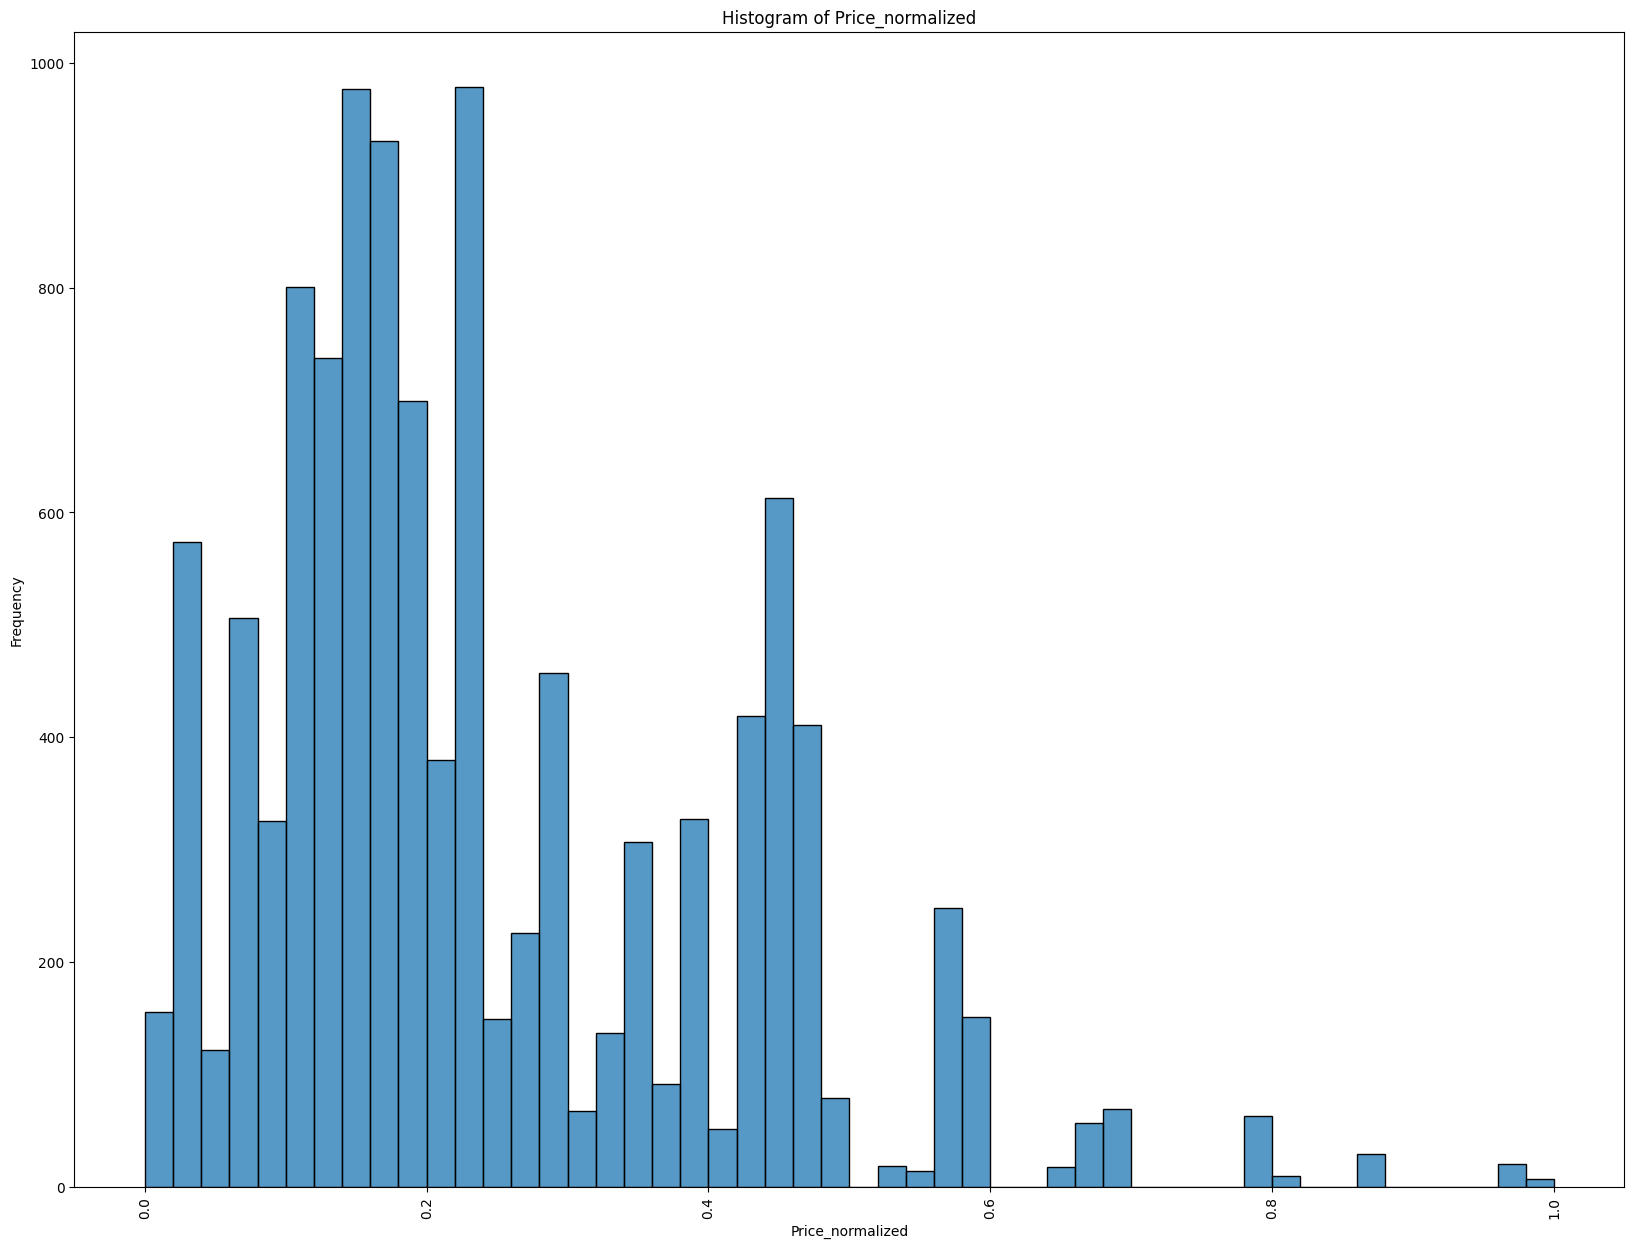

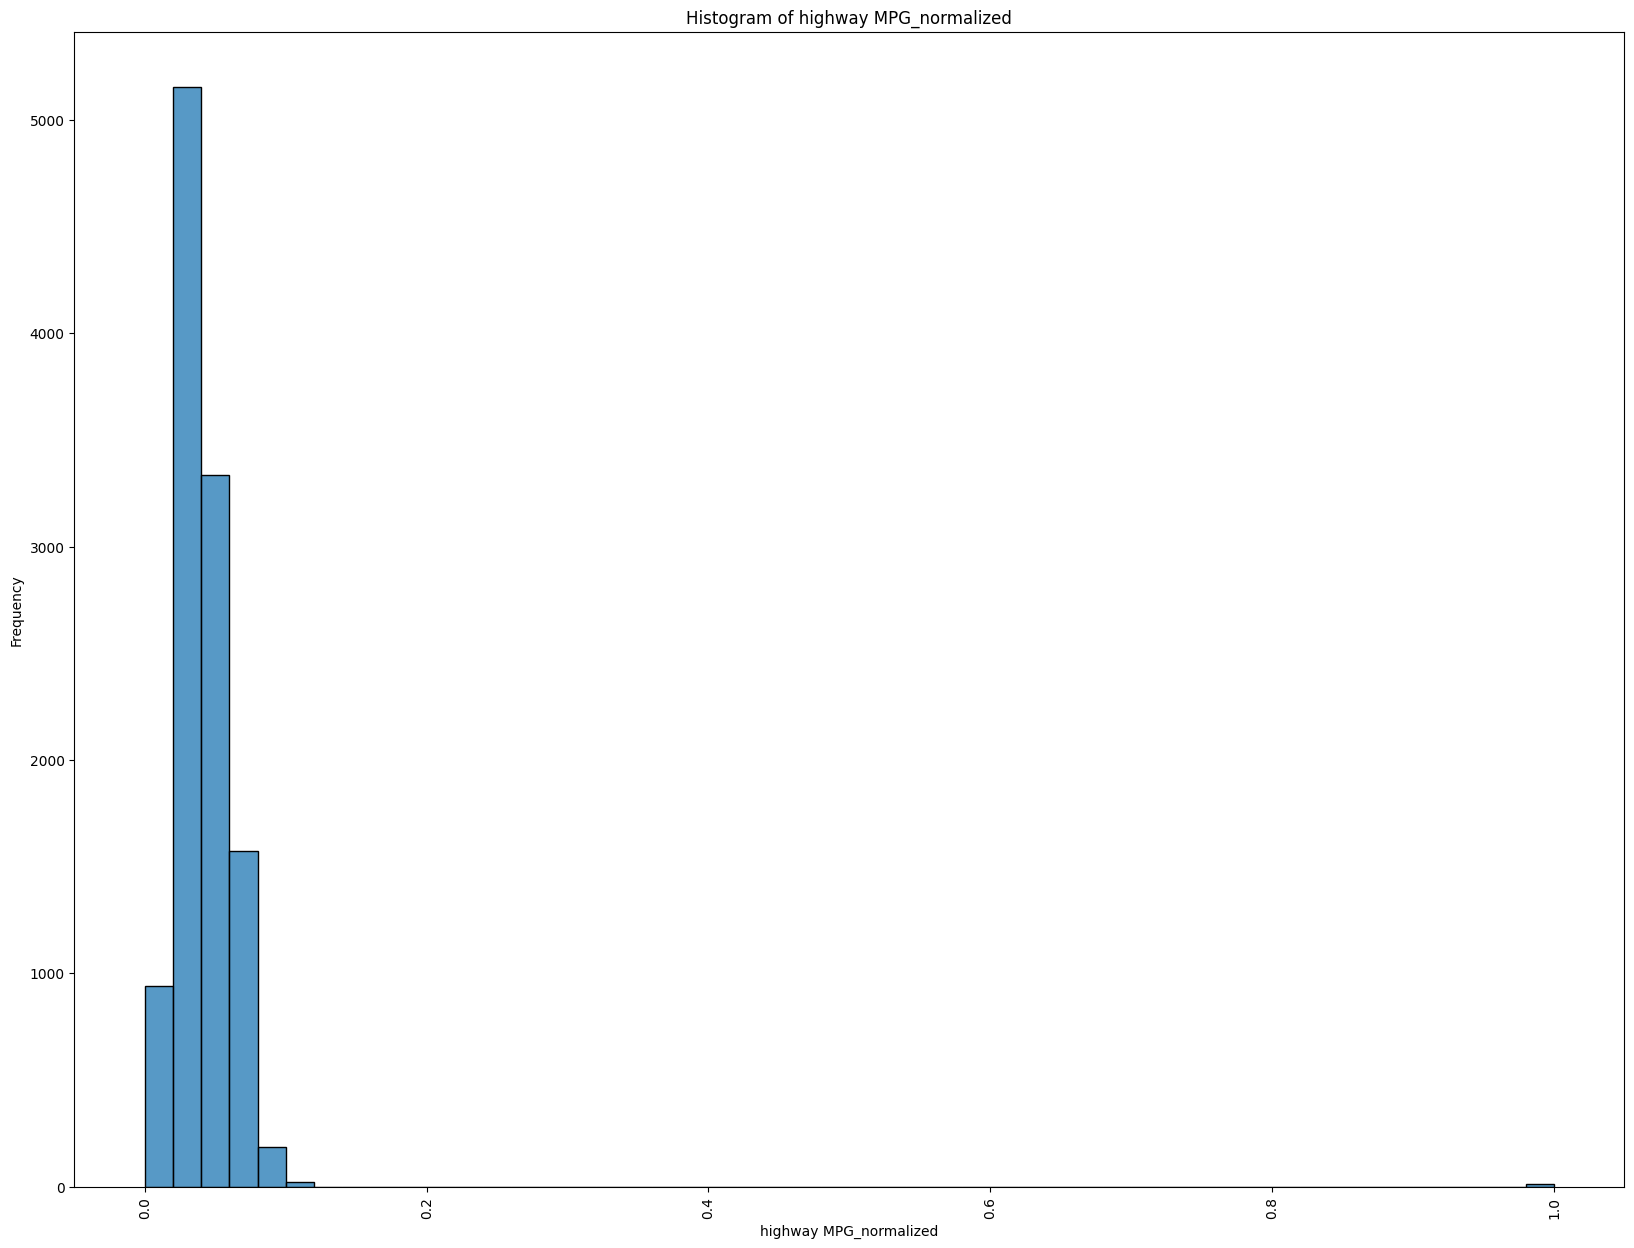

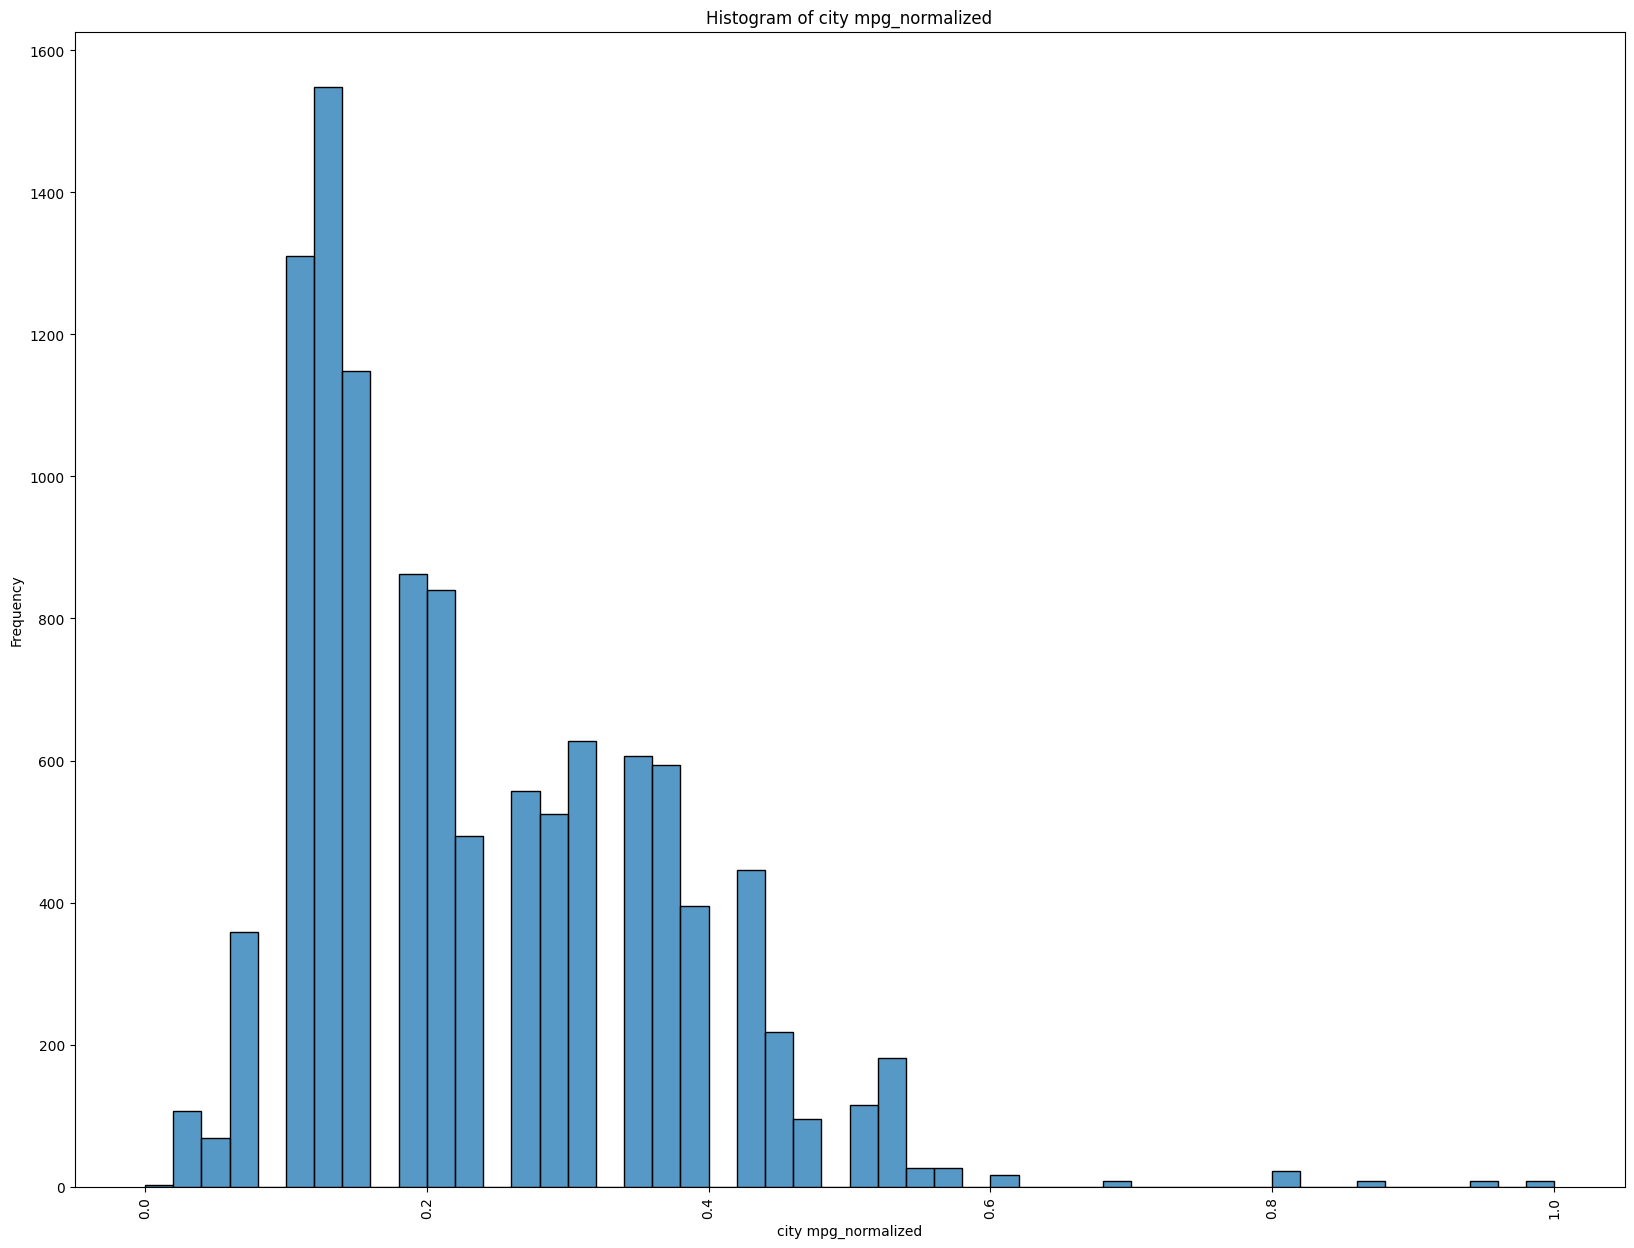

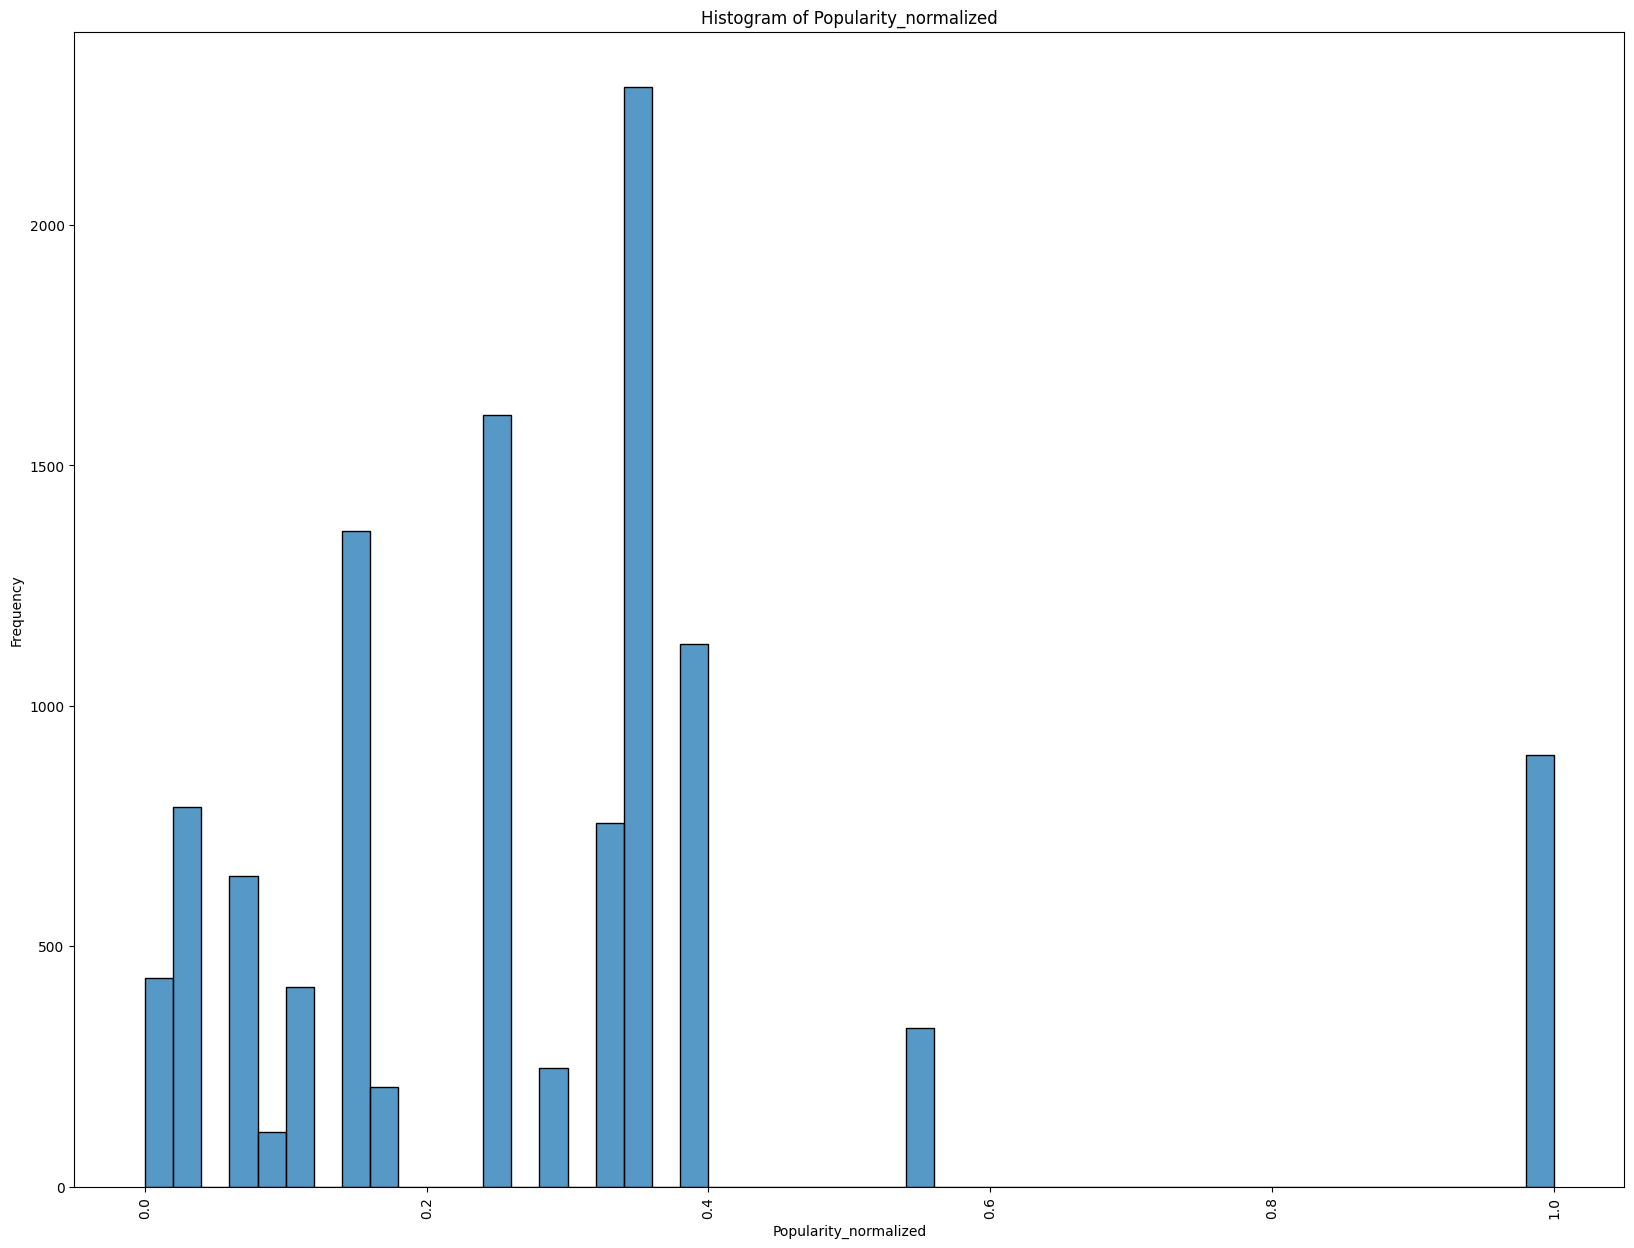

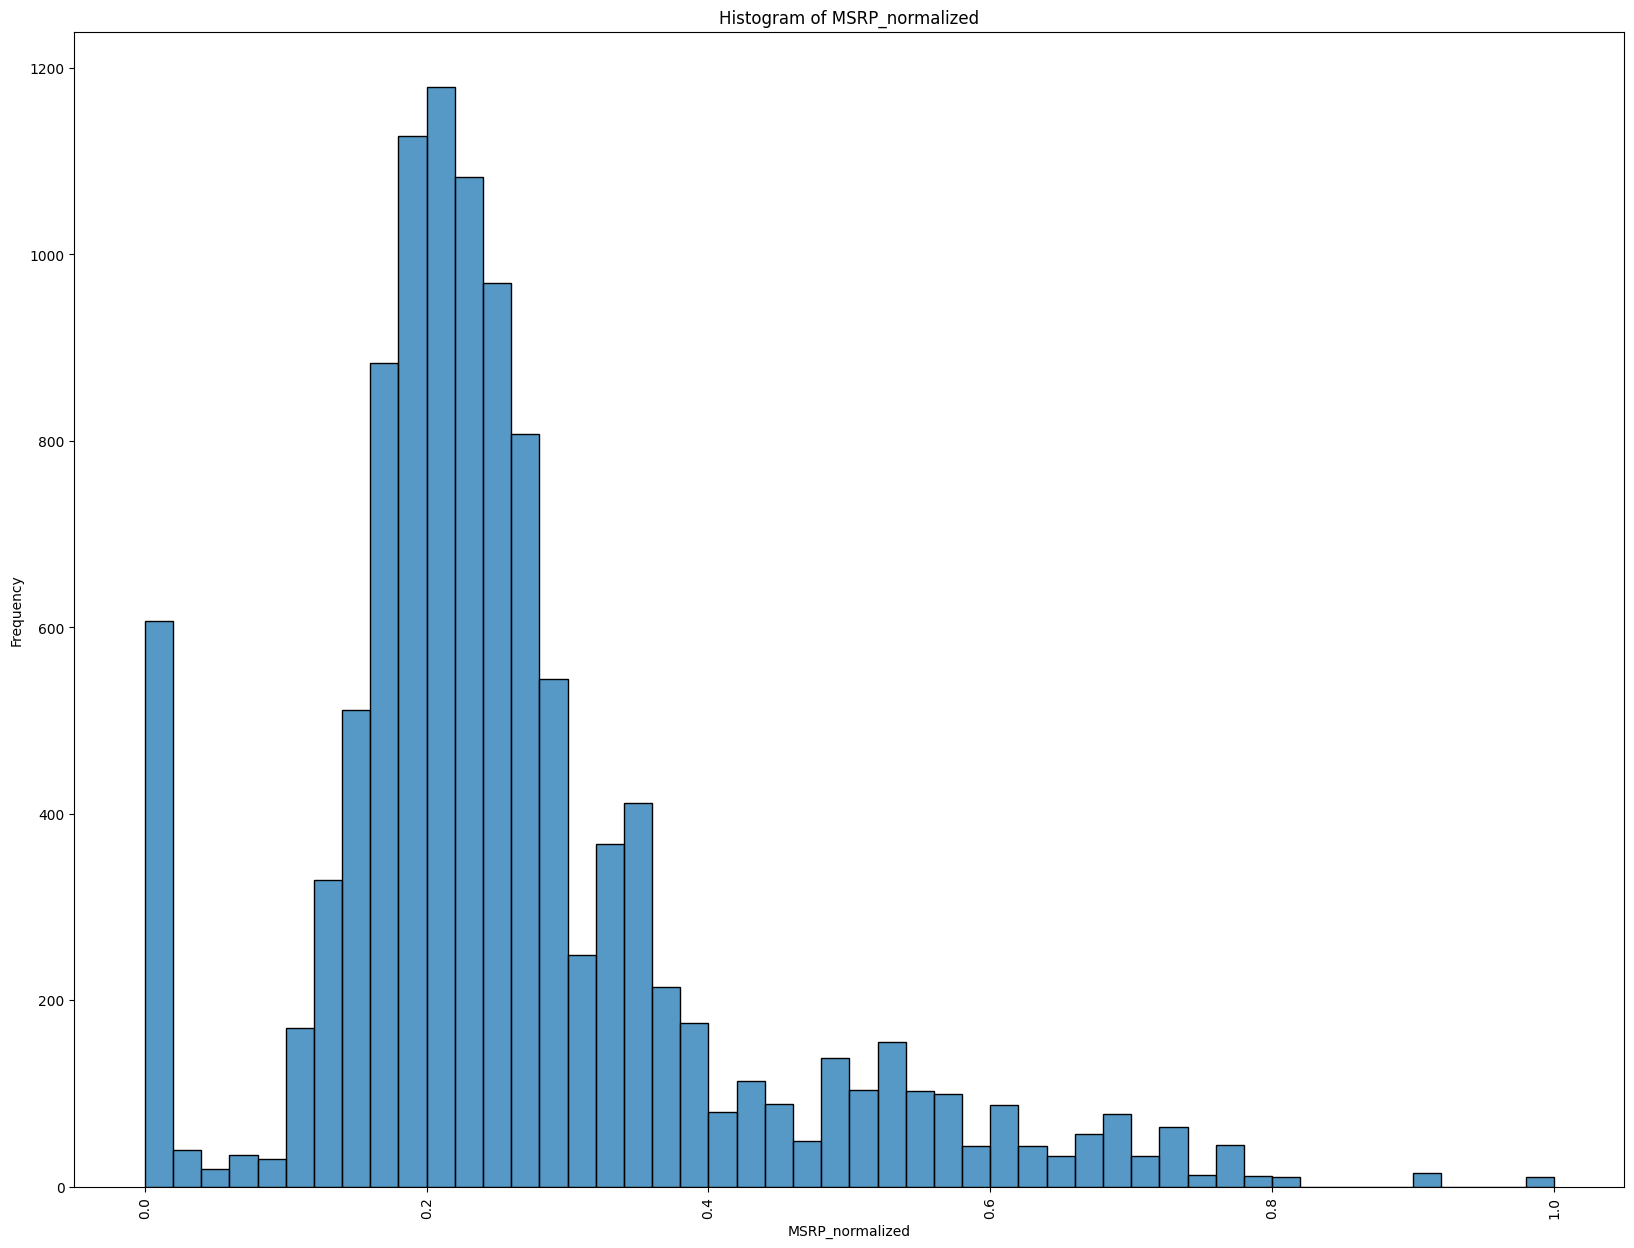

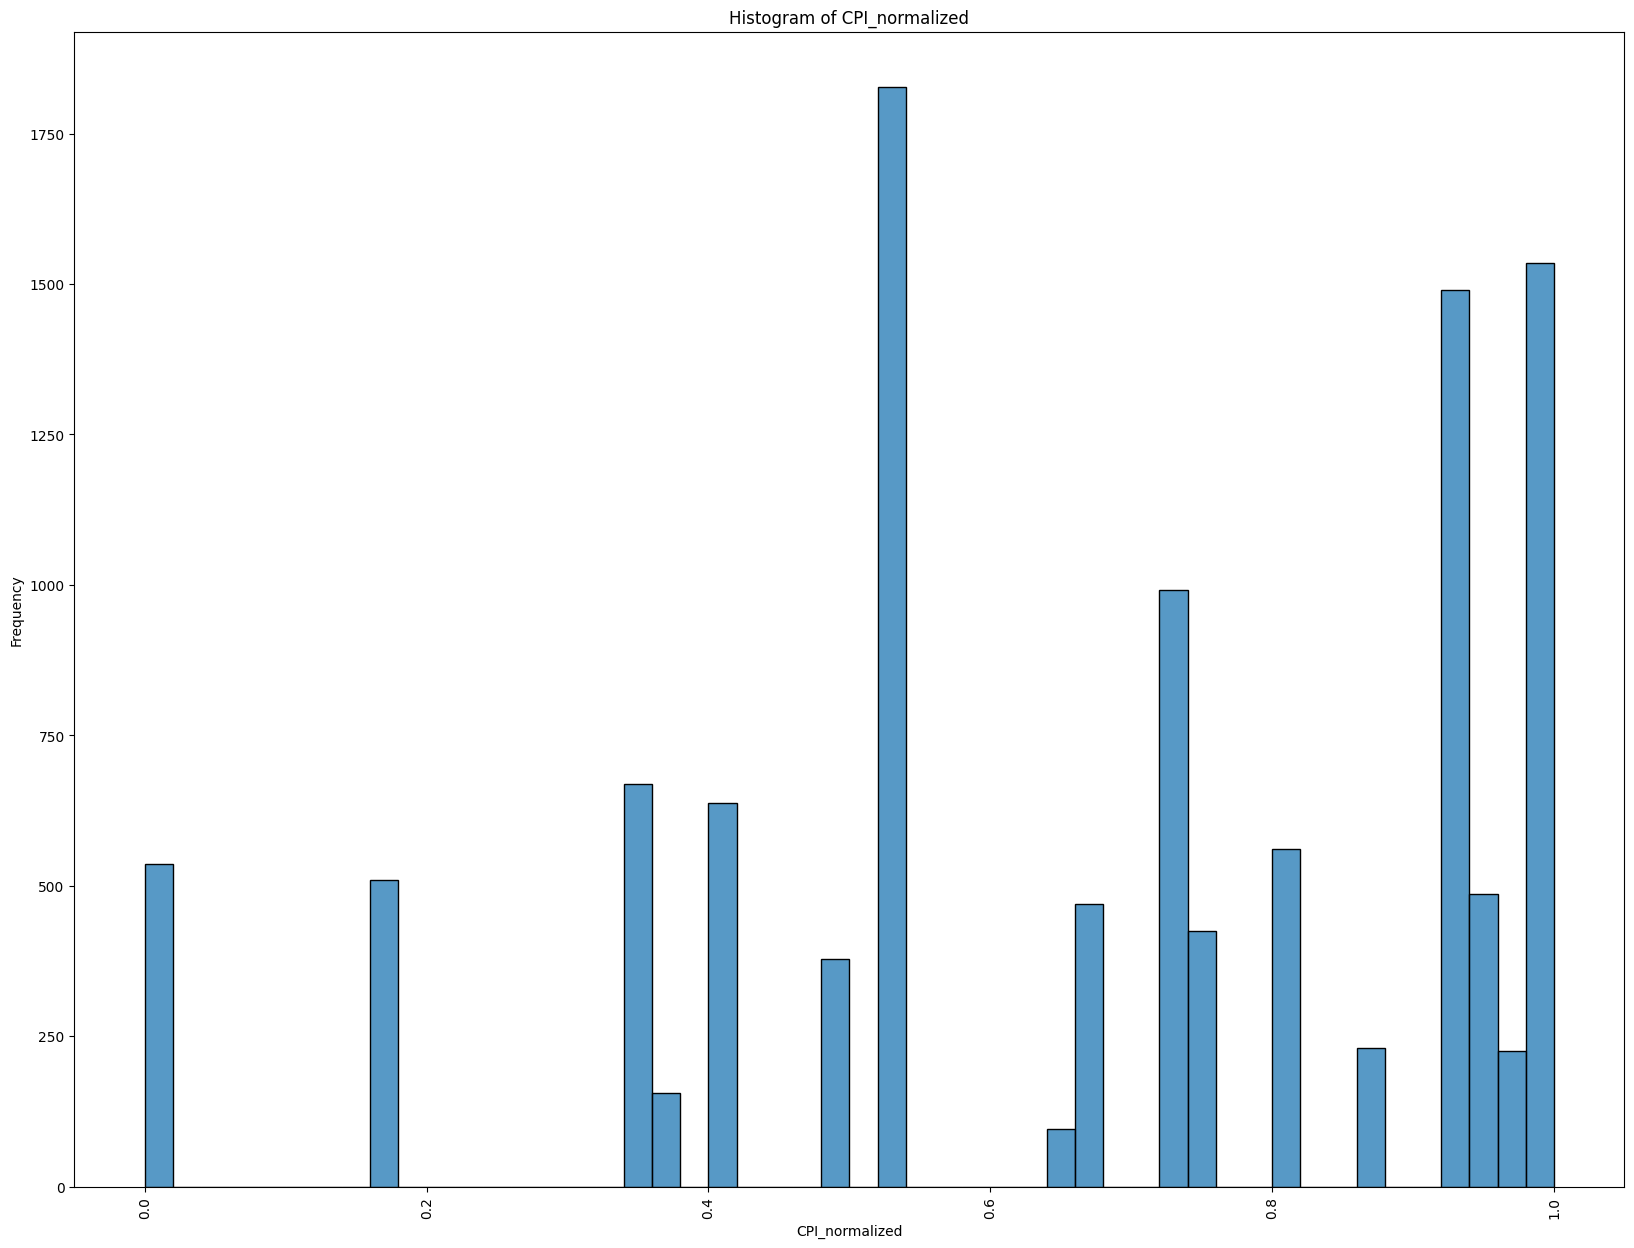

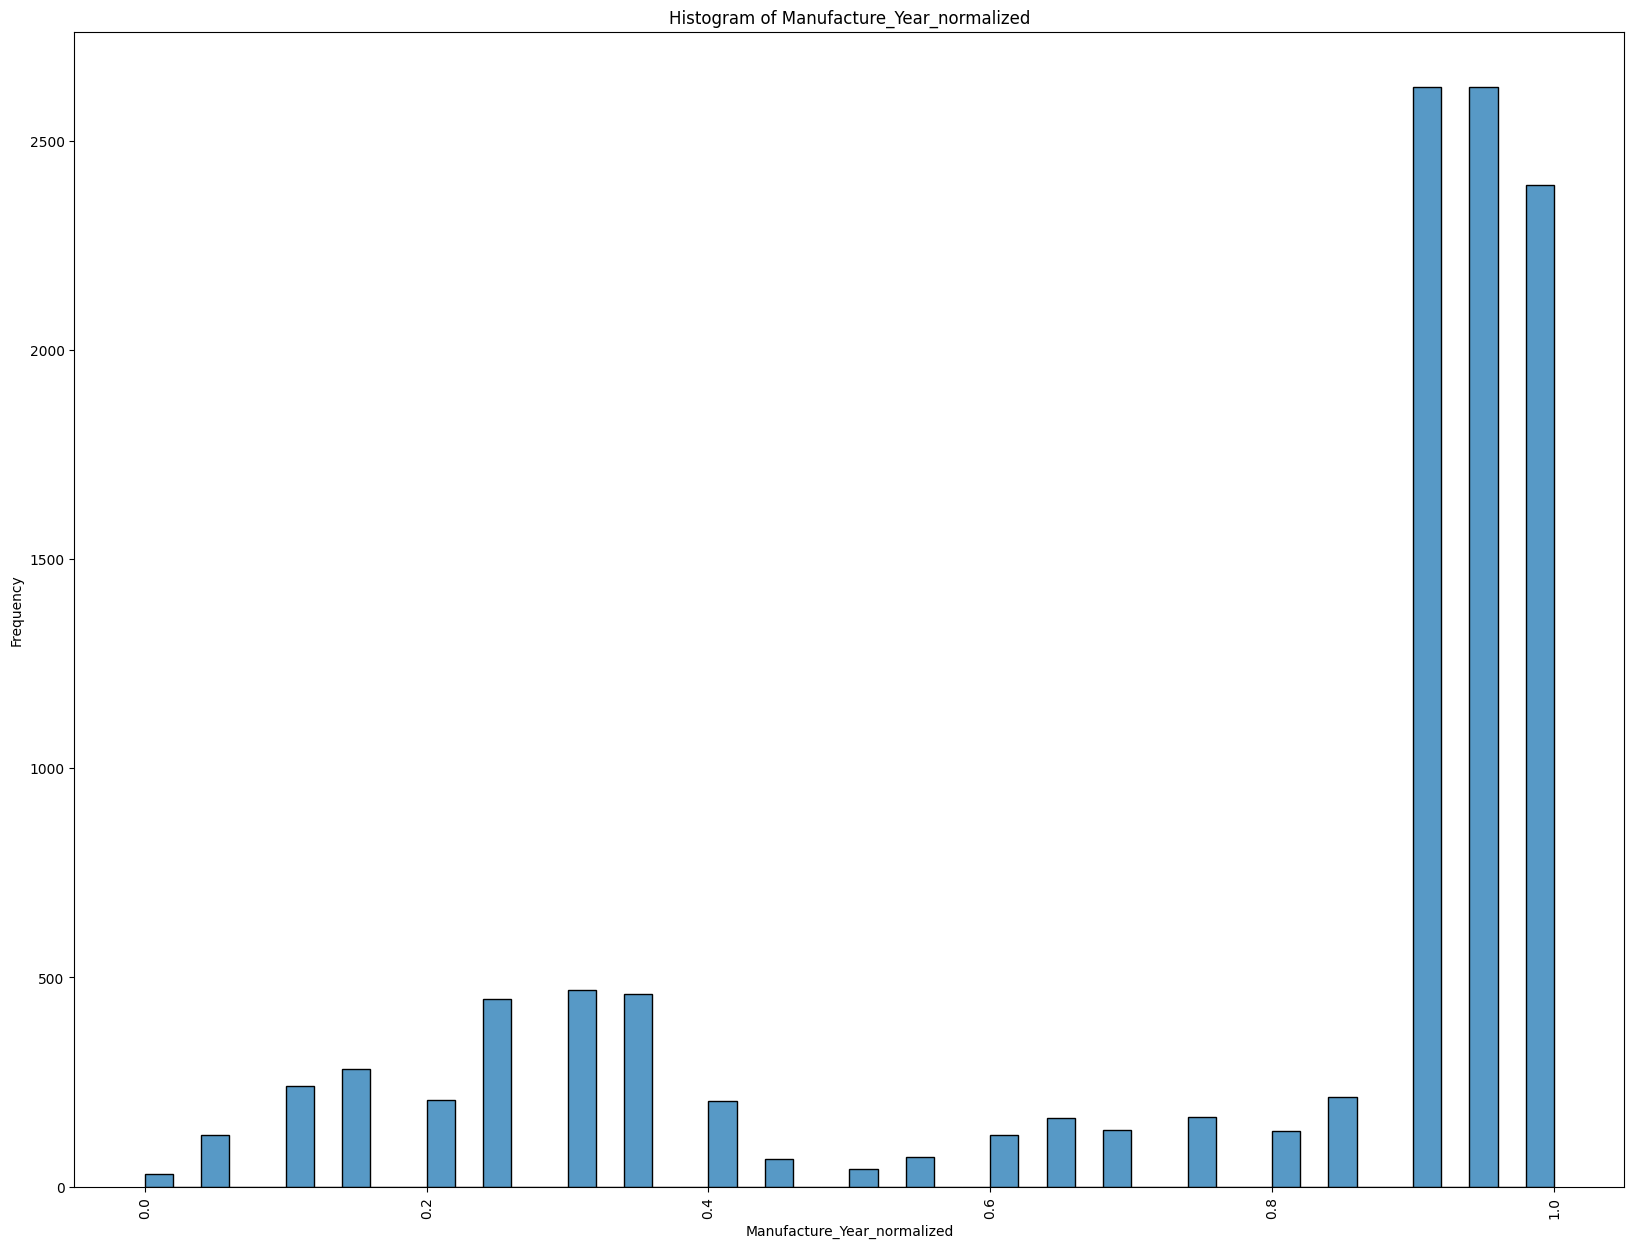

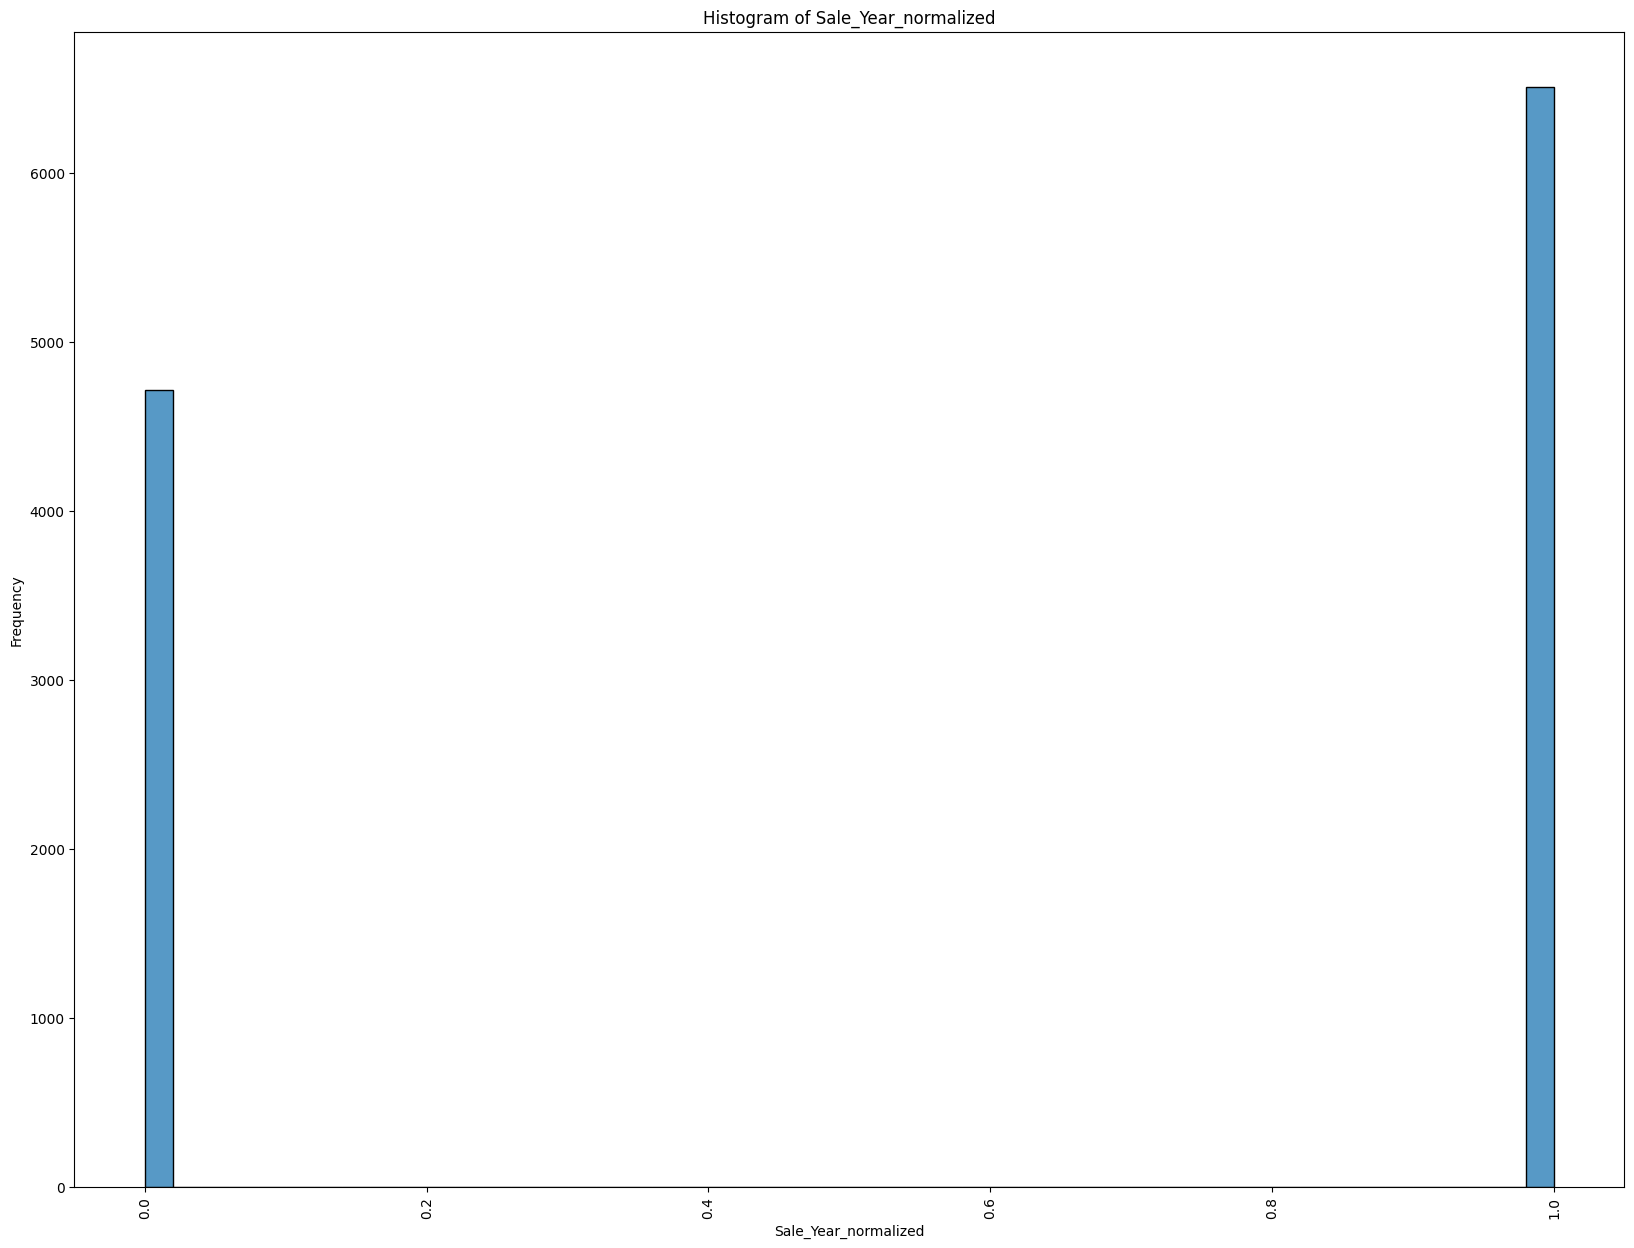

In [96]:
processed_df_n = normalize_numeric_data(processed_df_n, numerical_columns)
numerical_columns_standardized = [column + '_normalized' for column in numerical_columns]
histogram_data(processed_df_n, numerical_columns_standardized)

array([[<Axes: title={'center': 'Annual Income'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'Manufacture_Year'}>,
        <Axes: title={'center': 'Engine HP'}>,
        <Axes: title={'center': 'Engine Cylinders'}>,
        <Axes: title={'center': 'Number of Doors'}>],
       [<Axes: title={'center': 'highway MPG'}>,
        <Axes: title={'center': 'city mpg'}>,
        <Axes: title={'center': 'Popularity'}>,
        <Axes: title={'center': 'MSRP'}>],
       [<Axes: title={'center': 'CPI'}>,
        <Axes: title={'center': 'Sale_Year'}>, <Axes: >, <Axes: >]],
      dtype=object)

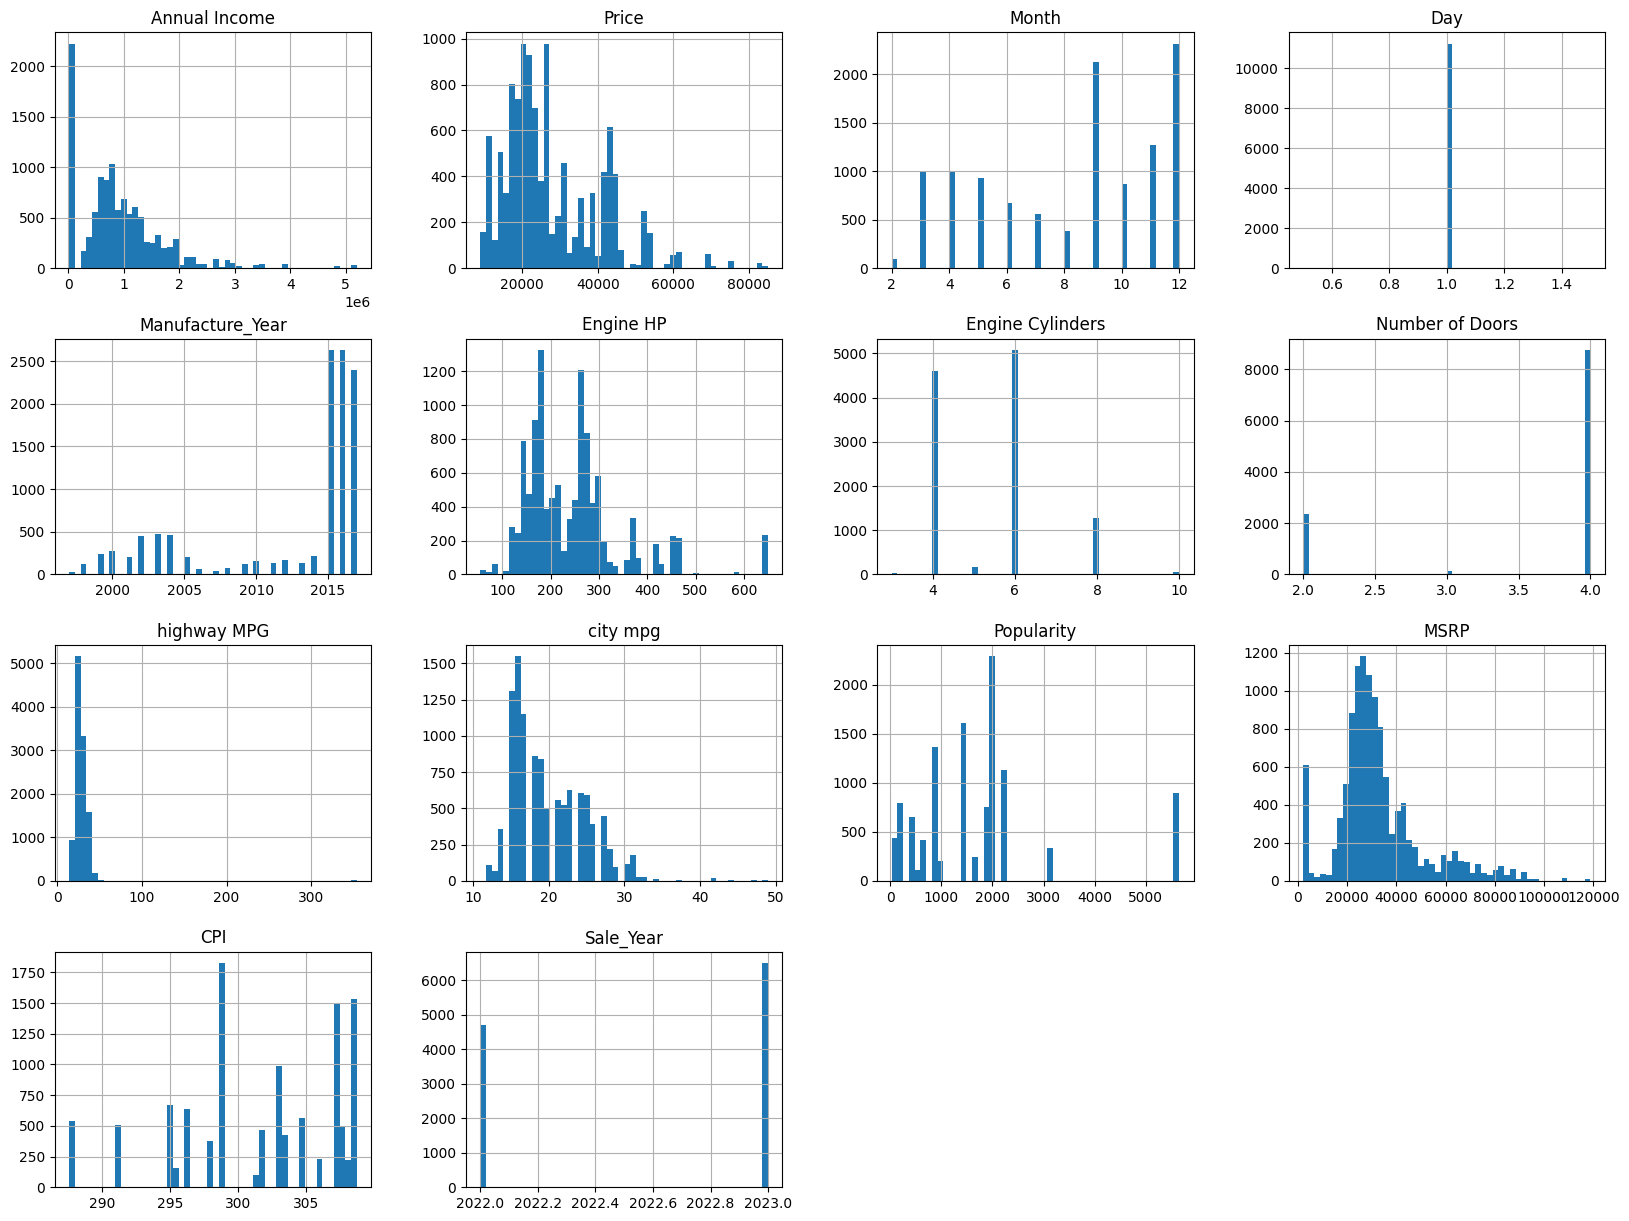

In [97]:
complete_df.hist(bins = 50, figsize=(20,15))